<a href="https://colab.research.google.com/github/Ratzifutzi/process-to-learn-ai/blob/main/day-1---numberAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 1 - A test for a linear-prediction
Here I tested a linear-prediction with a huge amount of numbers. The CSV haves 2 Header Values: *pass* and *number*. *Number* is a random number generated from 1 to 100 and *pass* is **0** by default. If *number*  is smaller than 25 or bigger than 75, *pass* gets **1**. Now I gave the algorithm that data, but removed the *pass* value. The algorithm haves the job to find a rule why *pass* is **1** and predict the value of *pass*

**Make sure to run the code in order that the variables get stored correctly or just use the Hotkey *CTRL + F9***

In [1]:
!pip install -q sklearn #Install all the required libaries

In [ ]:
#Imports - obviously

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

linear square

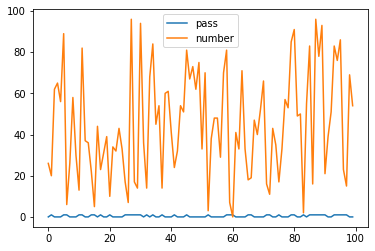

In [ ]:
# Load dataset
dftrain = pd.read_csv('http://173.212.239.105:3000/ml/NumberTest/train.csv') # training data
dfeval = pd.read_csv('http://173.212.239.105:3000/ml/NumberTest/test.csv') # testing data

dftrain.plot() # Shows frequency of every Number

y_train = dftrain.pop('pass') # Remove the pass value from all datasets
#y_eval = dfeval.pop('pass') # Remove the pass value from all datasets

In [ ]:
# Give every input Value a unique ID

CATEGORICAL_COLUMNS = []
NUMERIC_COLUMNS = ['number']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
# Complicated stuff u dont need to understand except u are really interested in that shit

def make_input_fn(data_df, label_df, num_epochs=40000, shuffle=True, batch_size=150):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

[0.4064001, 0.43094528, 0.3384352, 0.34854442, 0.4697661, 0.3042401, 0.4199868, 0.53969544, 0.3260038, 0.38496393]
REACHED A RESULT OF 69.9999988079071%
{'accuracy': 0.7, 'accuracy_baseline': 0.6, 'auc': 0.25, 'auc_precision_recall': 0.46498746, 'average_loss': 0.71900475, 'label/mean': 0.4, 'loss': 0.71900475, 'precision': 1.0, 'prediction/mean': 0.39689815, 'recall': 0.25, 'global_step': 40000}


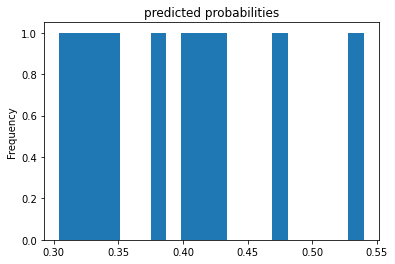

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# create a linear estimtor by passing the feature columns we created earlier

linear_est.train(train_input_fn)  # train

pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
probs.plot(kind='hist', bins=20, title='predicted probabilities')

result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears console output

print([pred['probabilities'][1] for pred in pred_dicts])

print("REACHED A RESULT OF " + str( result['accuracy'] * 100 ) + "%")  # the result variable is simply a dict of stats about our model

print(result)